x=       Temp   Bmp
0        0   900
1        0   905
2        0   910
3        0   915
4        0   920
...    ...   ...
1995    49  1075
1996    49  1080
1997    49  1085
1998    49  1090
1999    49  1095

[2000 rows x 2 columns]
y=          Do
0     12.99
1     13.06
2     13.13
3     13.21
4     13.28
...     ...
1995   5.95
1996   5.98
1997   6.01
1998   6.04
1999   6.07

[2000 rows x 1 columns]


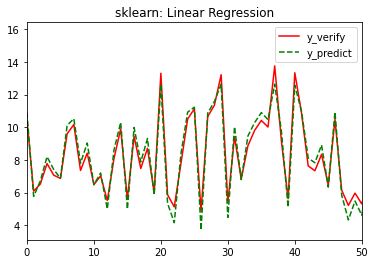

[[-0.17094152  0.00901091]]
[3.98479128]
MSE: 0.29374075821841156
RMSE: 0.5419785588179772
0.9531199708683219
0.9539332128126937
R2得分: 0.9518940029535329


In [40]:
from sklearn import datasets

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics as sm
 
'''----------load 数据集-----------'''
dataset = datasets.load_boston()
dataset2=pd.read_csv('bigDo.csv')
#保留第一列到第二列的数据,iloc用法
new_data = dataset2.iloc[:, :2]
 
# x 训练特征：['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
#'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = new_data
#x=dataset2
print("x=",x)
 
target = dataset.target
#target=dataset.columns

#把label变为(?, 1)维度，为了使用下面的数据集合分割
#y = np.reshape(target,(len(target), 1))
y= dataset2.iloc[:, 2:3]
print("y=",y)
 
#讲数据集1:3比例分割为 测试集：训练集
x_train, x_verify, y_train, y_verify = train_test_split(x, y, random_state=1)
 
'''
x_train的shape：(379, 13)
y_train的shape：(379, 1)
x_verify的shape：(127, 13)
y_verify 的shape：(127, 1)
'''
 
 
'''----------定义线性回归模型，进行训练、预测-----------'''
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_verify)
 
 
'''----------图形化预测结果-----------'''
#只显示前50个预测结果，太多的话看起来不直观
plt.xlim([0,50])
plt.plot( range(len(y_verify)), y_verify, 'r', label='y_verify')
plt.plot( range(len(y_pred)), y_pred, 'g--', label='y_predict' )
plt.title('sklearn: Linear Regression')
plt.legend()
plt.savefig('lr-13.png')
plt.show()
 
 
'''----------输出模型参数、评价模型-----------'''
print(lr.coef_)
print(lr.intercept_)
print("MSE:",metrics.mean_squared_error(y_verify,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_verify,y_pred)))
 
#输出模型对应R-Square
print(lr.score(x_train,y_train))
print(lr.score(x_verify,y_verify))
print("R2得分:", sm.r2_score(y_pred, y_verify))


In [32]:
#  test= pd.read_csv('DoSmall.csv')
#  print("原始数据中的信息:\n", test)